In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

print("Jupyter Notebook is ready!")


Jupyter Notebook is ready!


In [2]:
# Core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [6]:
# Create sample DataFrame
df = pd.DataFrame({
    'x': np.arange(10),
    'y': np.arange(10) * 2
})

print(df.head())


   x  y
0  0  0
1  1  2
2  2  4
3  3  6
4  4  8


In [7]:
arr = np.array([1, 2, 3, 4])
print("Array + 1:", arr + 1)


Array + 1: [2 3 4 5]


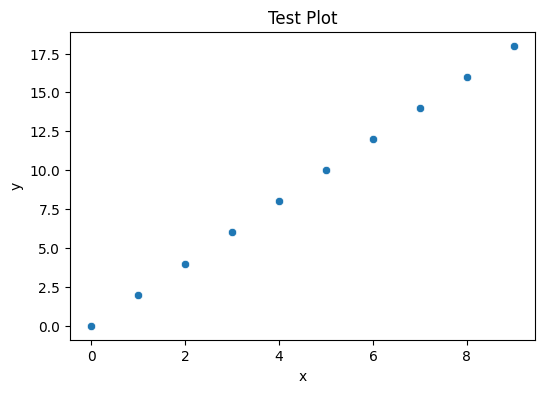

In [8]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='x', y='y', data=df)
plt.title("Test Plot")
plt.show()


In [12]:
# Split data
X = df[['x']]
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)
print("Mean Squared Error:", round(mean_squared_error(y_test, y_pred), 1))


Mean Squared Error: 0.0


In [2]:
# Verify installation
import nba_api

# Import core modules
from nba_api.stats.endpoints import leaguegamefinder
from nba_api.stats.static import teams
import pandas as pd
import time

In [3]:
from nba_api.stats.static import teams

# Get all NBA teams
nba_teams = teams.get_teams()

# Convert to DataFrame
df_teams = pd.DataFrame(nba_teams)
print(df_teams.head())

# Output columns:
# id, full_name, abbreviation, nickname, city, state, year_founded

# Example output:
#    id              full_name abbreviation    nickname          city state  year_founded
# 0  1610612737  Atlanta Hawks          ATL       Hawks       Atlanta    GA          1949
# 1  1610612738  Boston Celtics         BOS     Celtics        Boston    MA          1946
# 2  1610612739  Cleveland Cavaliers    CLE   Cavaliers     Cleveland    OH          1970

# Find specific team
lakers = [team for team in nba_teams if team['full_name'] == 'Los Angeles Lakers'][0]
lakers_id = lakers['id']
print(f"Lakers ID: {lakers_id}")  # 1610612747

           id             full_name abbreviation   nickname         city  \
0  1610612737         Atlanta Hawks          ATL      Hawks      Atlanta   
1  1610612738        Boston Celtics          BOS    Celtics       Boston   
2  1610612739   Cleveland Cavaliers          CLE  Cavaliers    Cleveland   
3  1610612740  New Orleans Pelicans          NOP   Pelicans  New Orleans   
4  1610612741         Chicago Bulls          CHI      Bulls      Chicago   

           state  year_founded  
0        Georgia          1949  
1  Massachusetts          1946  
2           Ohio          1970  
3      Louisiana          2002  
4       Illinois          1966  
Lakers ID: 1610612747


In [4]:
from nba_api.stats.endpoints import leaguegamefinder
import pandas as pd

# This will succeed on your machine:
gamefinder = leaguegamefinder.LeagueGameFinder(
    season_nullable='2023-24',
    season_type_nullable='Regular Season'
)
games = gamefinder.get_data_frames()[0]

# Process and save
games.to_csv('nba_games_2023_24.csv', index=False)

In [3]:
import pandas; 
print(pandas.__version__)

2.3.3


In [1]:
import pandas as pd

df = pd.read_csv('data/processed/nba/nba_game_level_data.csv')

# Basic counts
print("=" * 80)
print("DATA CHECK")
print("=" * 80)
print(f"\nTotal games: {len(df)}")
print(f"Unique GAME_IDs: {df['GAME_ID'].nunique()}")
print(f"Duplicates: {df['GAME_ID'].duplicated().sum()}")

# Seasons
seasons = sorted(df['SEASON'].unique())
print(f"\nSeasons ({len(seasons)}):")
for season in seasons:
    count = (df['SEASON'] == season).sum()
    print(f"  {season}: {count} games")

# Teams
all_teams = set(df['HOME_TEAM_ID']).union(set(df['AWAY_TEAM_ID']))
print(f"\nUnique teams: {len(all_teams)}")

# Calculate expected max
expected_max = len(all_teams) * len(seasons)
print(f"\nExpected maximum games to remove: {expected_max}")
print(f"Your actual removal: 191")
print(f"Difference: {191 - expected_max:+d}")

if 191 > expected_max:
    print(f"\n🐛 BUG CONFIRMED!")
    print(f"   Removing {191 - expected_max} MORE games than mathematically possible")

DATA CHECK

Total games: 5164
Unique GAME_IDs: 5164
Duplicates: 0

Seasons (5):
  2021-22: 1230 games
  2022-23: 1230 games
  2023-24: 1230 games
  2024-25: 1225 games
  2025-26: 249 games

Unique teams: 30

Expected maximum games to remove: 150
Your actual removal: 191
Difference: +41

🐛 BUG CONFIRMED!
   Removing 41 MORE games than mathematically possible


c:\Users\userPC\projects\predictive-modeling-platform\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127974 (\N{BANK}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


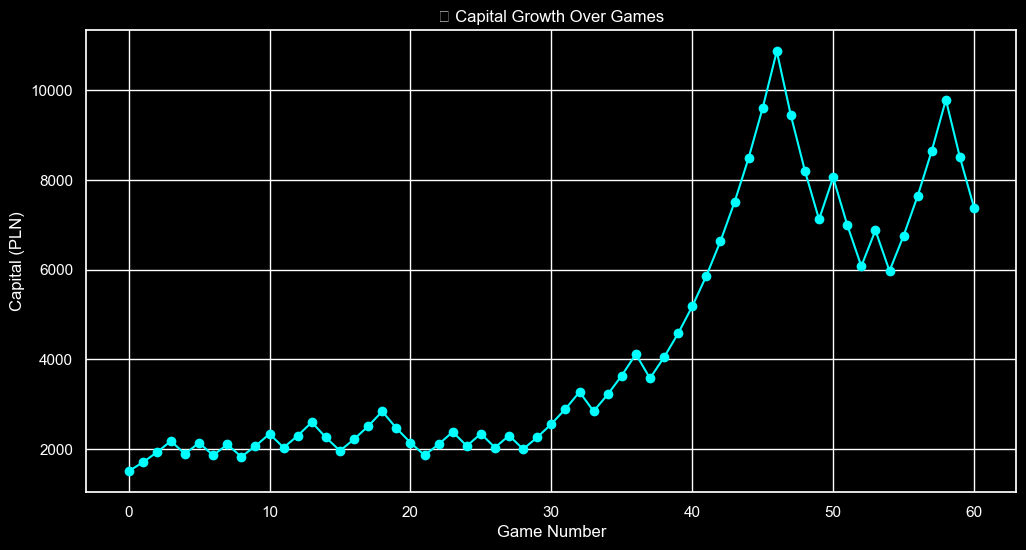

Final Capital after 60 games: 7384.12 PLN


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")
plt.style.use("dark_background")

starting_capital = 1500
games = 60
odds = 1.9
p_win = 0.651  # model accuracy
capital = [starting_capital]

for _ in range(games):
    f = 0.5 * ((odds-1)*p_win - (1-p_win)) / (odds-1)  # half Kelly
    bet = capital[-1] * f
    win = np.random.rand() < p_win
    capital.append(capital[-1] + bet if win else capital[-1] - bet)

plt.figure(figsize=(12,6))
plt.plot(capital, marker='o', color='cyan')
plt.title("🏦 Capital Growth Over Games")
plt.xlabel("Game Number")
plt.ylabel("Capital (PLN)")
plt.show()
print(f"Final Capital after {games} games: {capital[-1]:.2f} PLN")

c:\Users\userPC\projects\predictive-modeling-platform\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127974 (\N{BANK}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


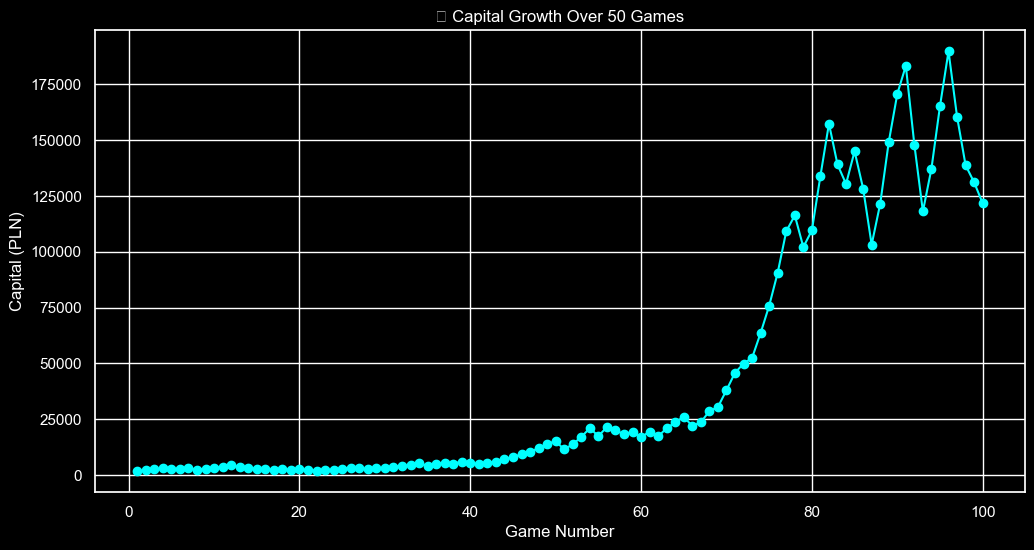

,Game,Predicted_Prob,Bet_Amount,Capital
0,1,0.624908,187.362036,1687.362036
1,2,0.740143,405.207947,2092.569983
2,3,0.696399,410.978209,2503.548192
3,4,0.669732,424.931483,2928.479675
4,5,0.581204,237.803467,2690.676208
...,...,...,...,...
95,96,0.648759,24581.443495,189824.714733
96,97,0.654547,29336.757780,160487.956953
97,98,0.635508,21747.434758,138740.522195
98,99,0.555084,7642.358693,131098.163502


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")
plt.style.use("dark_background")

# Parameters
starting_capital = 1500
games = 100
odds = 2.0
half_kelly = 0.5

# Simulate predicted probabilities around model accuracy
np.random.seed(42)
pred_probs = np.random.uniform(0.55, 0.75, games)  # model predicts varying probabilities

capital = [starting_capital]
bets = []

for i in range(games):
    p = pred_probs[i]
    f = half_kelly * ((odds - 1) * p - (1 - p)) / (odds - 1)  # half Kelly fraction
    bet_amount = capital[-1] * f
    bets.append(bet_amount)
    win = np.random.rand() < p
    capital.append(capital[-1] + bet_amount if win else capital[-1] - bet_amount)

# Create a DataFrame
df = pd.DataFrame({
    "Game": range(1, games+1),
    "Predicted_Prob": pred_probs,
    "Bet_Amount": bets,
    "Capital": capital[1:]
})

# Plot capital growth
plt.figure(figsize=(12,6))
plt.plot(df["Game"], df["Capital"], marker='o', color='cyan')
plt.title("🏦 Capital Growth Over 50 Games")
plt.xlabel("Game Number")
plt.ylabel("Capital (PLN)")
plt.show()

df.head(100)


c:\Users\userPC\projects\predictive-modeling-platform\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127936 (\N{BASKETBALL AND HOOP}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


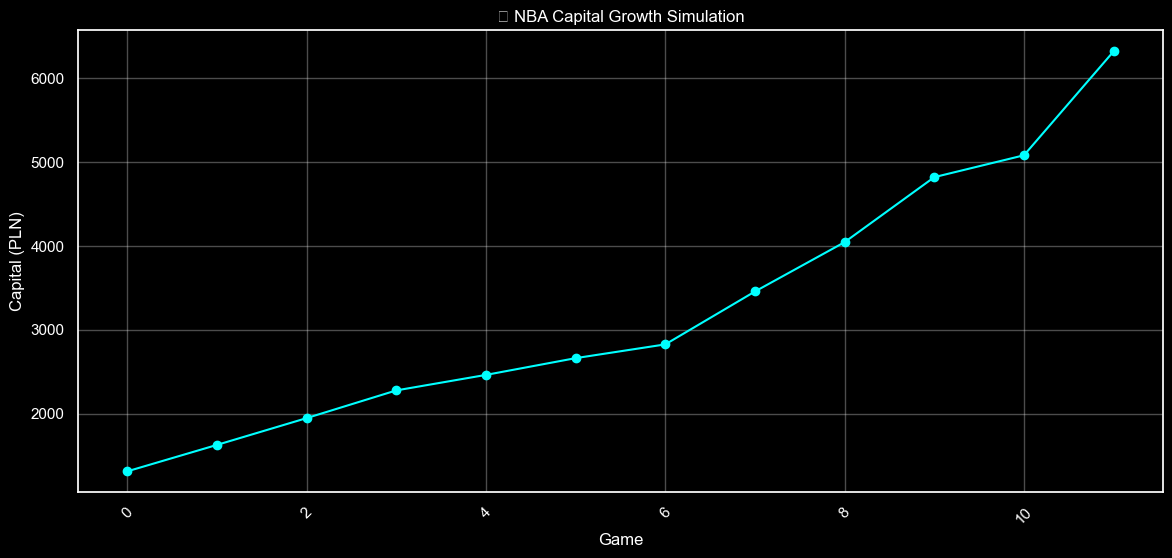

                        Game  Pred_Prob  Bet_Amount Result  Capital_After
0             Rockets @ Nets       0.62      187.36   Loss        1312.64
1             Heat @ Pistons       0.74      315.22    Win        1627.86
2          76ers @ Mavericks       0.70      319.71    Win        1947.57
3            Celtics @ Kings       0.67      330.56    Win        2278.13
4            Jazz @ Clippers       0.58      184.99    Win        2463.12
5             Spurs @ Pacers       0.58      200.00    Win        2663.13
6             Nets @ Wizards       0.56      164.09    Win        2827.22
7        Nuggets @ Cavaliers       0.72      631.14    Win        3458.36
8             Hawks @ Knicks       0.67      588.69    Win        4047.05
9   Trail Blazers @ Pelicans       0.69      775.47    Win        4822.52
10             Magic @ Bulls       0.55      260.98    Win        5083.50
11           Hornets @ Bucks       0.74     1240.28    Win        6323.78


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")
plt.style.use("dark_background")

# -------------------------------
# 1️⃣ Parameters
# -------------------------------
starting_capital = 1500
half_kelly = 0.5
odds = 2.0  # decimal odds
np.random.seed(42)

# -------------------------------
# 2️⃣ NBA schedule (example subset, replace with full)
# -------------------------------
schedule = [
    "Rockets @ Nets", "Heat @ Pistons", "76ers @ Mavericks",
    "Celtics @ Kings", "Jazz @ Clippers", "Spurs @ Pacers",
    "Nets @ Wizards", "Nuggets @ Cavaliers", "Hawks @ Knicks",
    "Trail Blazers @ Pelicans", "Magic @ Bulls", "Hornets @ Bucks"
]

# -------------------------------
# 3️⃣ Predicted probabilities
# -------------------------------
# Replace this with your model's predicted probabilities for each game
pred_probs = np.random.uniform(0.55, 0.75, len(schedule))  # simulate predictions

# -------------------------------
# 4️⃣ Simulation
# -------------------------------
capital = [starting_capital]
bets = []
results = []

for i, game in enumerate(schedule):
    p = pred_probs[i]
    f = half_kelly * ((odds - 1) * p - (1 - p)) / (odds - 1)  # half-Kelly fraction
    bet_amount = capital[-1] * f
    bets.append(bet_amount)
    
    # Simulate outcome
    win = np.random.rand() < p
    results.append("Win" if win else "Loss")
    capital.append(capital[-1] + bet_amount if win else capital[-1] - bet_amount)

# -------------------------------
# 5️⃣ Results DataFrame
# -------------------------------
df = pd.DataFrame({
    "Game": schedule,
    "Pred_Prob": pred_probs,
    "Bet_Amount": bets,
    "Result": results,
    "Capital_After": capital[1:]
})

# -------------------------------
# 6️⃣ Plot capital growth
# -------------------------------
plt.figure(figsize=(14,6))
plt.plot(df["Capital_After"], marker='o', color='cyan')
plt.xticks(rotation=45)
plt.title("🏀 NBA Capital Growth Simulation")
plt.xlabel("Game")
plt.ylabel("Capital (PLN)")
plt.grid(True, alpha=0.3)
plt.show()

# -------------------------------
# 7️⃣ Display table
# -------------------------------
pd.set_option('display.float_format', '{:.2f}'.format)
print(df)


In [1]:
import os
from pathlib import Path
import pandas as pd

print("="*70)
print("CURRENT PROJECT STRUCTURE ANALYSIS")
print("="*70)

# Define your project root (adjust if needed)
project_root = Path.cwd()  # Current working directory
print(f"\nProject Root: {project_root}\n")

# Function to scan directory and categorize files
def scan_directory(path, max_depth=3, current_depth=0):
    """Recursively scan directory and return file structure"""
    items = []
    
    if current_depth >= max_depth:
        return items
    
    try:
        for item in sorted(path.iterdir()):
            # Skip hidden files and common ignore patterns
            if item.name.startswith('.') or item.name in ['__pycache__', 'node_modules', '.git']:
                continue
            
            indent = "  " * current_depth
            
            if item.is_dir():
                items.append({
                    'path': str(item.relative_to(project_root)),
                    'type': 'DIR',
                    'name': item.name,
                    'depth': current_depth,
                    'size': '-'
                })
                # Recurse into subdirectories
                items.extend(scan_directory(item, max_depth, current_depth + 1))
            else:
                # Get file size
                size_bytes = item.stat().st_size
                if size_bytes > 1_000_000:
                    size_str = f"{size_bytes / 1_000_000:.1f} MB"
                elif size_bytes > 1_000:
                    size_str = f"{size_bytes / 1_000:.1f} KB"
                else:
                    size_str = f"{size_bytes} B"
                
                items.append({
                    'path': str(item.relative_to(project_root)),
                    'type': 'FILE',
                    'name': item.name,
                    'depth': current_depth,
                    'size': size_str,
                    'extension': item.suffix
                })
    except PermissionError:
        pass
    
    return items

# Scan the entire project
print("📂 Scanning project directories...\n")
structure = scan_directory(project_root, max_depth=4)

# Print directory tree
print("="*70)
print("DIRECTORY TREE")
print("="*70)
for item in structure:
    indent = "  " * item['depth']
    if item['type'] == 'DIR':
        print(f"{indent}📁 {item['name']}/")
    else:
        print(f"{indent}📄 {item['name']} ({item['size']})")

# Analyze by file type
print("\n" + "="*70)
print("FILE TYPE ANALYSIS")
print("="*70)

files_only = [item for item in structure if item['type'] == 'FILE']
df_files = pd.DataFrame(files_only)

if not df_files.empty:
    print("\nFiles by Extension:")
    extension_counts = df_files['extension'].value_counts()
    for ext, count in extension_counts.items():
        ext_display = ext if ext else '(no extension)'
        print(f"  {ext_display}: {count} files")

# Identify key directories
print("\n" + "="*70)
print("KEY DIRECTORIES FOUND")
print("="*70)

key_dirs = {
    'scripts': [],
    'data': [],
    'models': [],
    'notebooks': [],
    'docs': [],
}

for item in structure:
    if item['type'] == 'FILE':
        for key in key_dirs.keys():
            if key in item['path'].lower():
                key_dirs[key].append(item)

for dir_name, files in key_dirs.items():
    if files:
        print(f"\n📁 {dir_name.upper()}/ ({len(files)} files)")
        for f in files[:10]:  # Show first 10
            print(f"   • {f['path']} ({f['size']})")
        if len(files) > 10:
            print(f"   ... and {len(files) - 10} more files")

# Identify Python scripts that might need reorganization
print("\n" + "="*70)
print("PYTHON SCRIPTS INVENTORY")
print("="*70)

py_files = [item for item in structure if item['type'] == 'FILE' and item['extension'] == '.py']
print(f"\nFound {len(py_files)} Python files:\n")

for py_file in py_files:
    print(f"  • {py_file['path']}")

# Identify data files
print("\n" + "="*70)
print("DATA FILES INVENTORY")
print("="*70)

data_extensions = ['.csv', '.json', '.parquet', '.pkl', '.joblib']
data_files = [item for item in structure if item['type'] == 'FILE' and item['extension'] in data_extensions]
print(f"\nFound {len(data_files)} data files:\n")

for data_file in data_files:
    print(f"  • {data_file['path']} ({data_file['size']})")

# Generate cleanup recommendations
print("\n" + "="*70)
print("CLEANUP RECOMMENDATIONS")
print("="*70)

print("""
Based on your scan, I recommend:

1. SCRIPTS REORGANIZATION:
   Move all Python scripts into organized subdirectories:
   - scripts/data_collection/     (API fetching, scraping)
   - scripts/preprocessing/       (cleaning, feature engineering)
   - scripts/training/            (model training, evaluation)

2. DATA REORGANIZATION:
   - data/raw/nba/               (original API downloads)
   - data/processed/nba/         (cleaned, ready for modeling)
   - data/models/nba/            (trained model files .pkl)

3. IDENTIFY OBSOLETE FILES:
   - Temporary test scripts
   - Duplicate datasets
   - Old versions of processing scripts

Would you like me to:
A) Generate a detailed reorganization plan with move commands
B) Create a cleanup script that backs up and reorganizes
C) Identify which specific files should go where
""")

# Save scan results
scan_df = pd.DataFrame(structure)
scan_df.to_csv('project_structure_scan.csv', index=False)
print("\n✅ Full scan saved to: project_structure_scan.csv")

CURRENT PROJECT STRUCTURE ANALYSIS

Project Root: c:\Users\userPC\projects\predictive-modeling-platform

📂 Scanning project directories...

DIRECTORY TREE
📄 calibration.png (119.6 KB)
📁 data/
  📁 models/
    📁 nba/
  📁 processed/
    📁 nba/
      📄 nba_game_level_data.csv (4.7 MB)
      📄 nba_game_level_with_rest.csv (4.8 MB)
      📄 nba_stats_lagged.csv (4.7 MB)
      📄 nba_team_game_data.csv (5.0 MB)
      📄 nba_train_data.csv (4.7 MB)
      📁 splits/
      📄 team_stats_hybrid.csv (3.3 MB)
  📁 raw/
    📁 nba/
      📄 nba_games_data.csv (1.6 MB)
      📄 nba_stats_2021_22.csv (918.6 KB)
      📄 nba_stats_2022_23.csv (919.2 KB)
      📄 nba_stats_2023_24.csv (919.0 KB)
      📄 nba_stats_2024_25.csv (919.2 KB)
      📄 nba_stats_2025_26.csv (184.1 KB)
      📄 nba_stats_data.csv (3.9 MB)
      📄 nba_stats_data_cleaned.csv (2.9 MB)
      📄 nba_team_advanced_stats.csv (17.9 KB)
📁 docs/
  📁 articles/
    📄 how_our_models_work.md (0 B)
    📄 nba_predictions_v1.md (0 B)
    📄 understanding_proba

In [2]:
import os
import shutil
from pathlib import Path
from datetime import datetime

print("="*70)
print("PROJECT REORGANIZATION PLAN")
print("="*70)

# Create backup directory first
backup_dir = Path(f"backup_{datetime.now().strftime('%Y%m%d_%H%M%S')}")
backup_dir.mkdir(exist_ok=True)
print(f"\n📦 Backup directory created: {backup_dir}\n")

# Define the reorganization mapping
reorganization_plan = {
    
    # ===== DATA COLLECTION SCRIPTS =====
    "scripts/data_collection/": {
        # Keep these - they ARE data collection
        "KEEP": [
            "collect_nba_games.py",           # ✅ Fetches game data from API
            "collect_team_stats.py",          # ✅ Fetches team stats from API
            "collect_hybrid_stats.py",        # ✅ Fetches hybrid stats
            "fetch_raw_nba_advanced_stats.py", # ✅ Fetches advanced stats
            "test_nba_api.py",                # ✅ API testing
            "helpers.py",                     # ✅ Helper functions
            "README.md",                      # ✅ Documentation
        ],
        # Move to preprocessing
        "MOVE_TO_PREPROCESSING": [
            "add_features.py",                # Feature engineering
            "check_data_quality.py",          # Data validation
            "clean_merged_data.py",           # Data cleaning
            "create_game_level.py",           # Data transformation
            "lag_stats.py",                   # Feature creation
            "merge_seasons.py",               # Data merging
            "merge_team_data.py",             # Data merging
            "remove_first_season_game.py",    # Data filtering
            "corrected_feature_extraction.py", # Feature engineering
            "find_both_home_games.py",        # Data validation
            "quick_statistics.py",            # EDA/analysis
        ],
        # Move to training
        "MOVE_TO_TRAINING": [
            "chatgpt_model_training.py",      # Model training (old)
            "corrected_model_training.py",    # Model training (corrected)
            "test_model.py",                  # Model testing
            "create_train_val_test_split.py", # Data splitting
            "dataset_split.py",               # Data splitting (duplicate?)
        ],
        # Archive/delete (obsolete or experimental)
        "ARCHIVE": [
            "organize_project.py",            # This reorganization script itself
            "kelly.py",                       # Kelly criterion (betting - maybe keep?)
        ],
    },
    
    # ===== DATA FILES =====
    "data/": {
        "RAW_KEEP": [
            "data/raw/nba/nba_games_data.csv",         # ✅ Original game data
            "data/raw/nba/nba_stats_2021_22.csv",      # ✅ Season stats
            "data/raw/nba/nba_stats_2022_23.csv",
            "data/raw/nba/nba_stats_2023_24.csv",
            "data/raw/nba/nba_stats_2024_25.csv",
            "data/raw/nba/nba_stats_2025_26.csv",
        ],
        "RAW_CONSOLIDATE": [
            "data/raw/nba/nba_stats_data.csv",         # Merged version
            "data/raw/nba/nba_stats_data_cleaned.csv", # Cleaned merged
            "data/raw/nba/nba_team_advanced_stats.csv",
        ],
        "PROCESSED_KEEP": [
            "data/processed/nba/nba_train_data.csv",   # ✅ FINAL training data
        ],
        "PROCESSED_INTERMEDIATE": [
            "data/processed/nba/nba_game_level_data.csv",
            "data/processed/nba/nba_game_level_with_rest.csv",
            "data/processed/nba/nba_stats_lagged.csv",
            "data/processed/nba/nba_team_game_data.csv",
            "data/processed/nba/team_stats_hybrid.csv",
        ],
    },
    
    # ===== ROOT DIRECTORY CLEANUP =====
    "root_files/": {
        "MOVE_TO_NOTEBOOKS": [
            "test_notebook.ipynb",
            "calibration.png",
            "feature_importance.png",
            "target_distribution.png",
        ],
        "MOVE_TO_DATA_PROCESSED": [
            "train.csv",                      # Split data
            "val.csv",
            "test.csv",
            "nba_train_data.csv",             # Duplicate?
        ],
        "MOVE_TO_DOCS": [
            "rest_correlation_matrix.png",    # EDA output
        ],
    },
    
    # ===== NOTEBOOKS CLEANUP =====
    "notebooks/": {
        "MOVE_TO_DATA": [
            "notebooks/nba_train_data.csv",           # Duplicate
            "notebooks/nba_train_data_enhanced.csv",  # Latest version
            "notebooks/feature_summary_stats.csv",
            "notebooks/model_features.txt",
        ],
    },
}

print("="*70)
print("REORGANIZATION ACTIONS")
print("="*70)

# ===== STEP 1: Create new directory structure =====
print("\n📁 STEP 1: Creating organized directory structure...\n")

new_dirs = [
    "scripts/data_collection",
    "scripts/preprocessing", 
    "scripts/training",
    "scripts/archived",
    "data/raw/nba",
    "data/processed/nba/intermediate",
    "data/processed/nba/final",
    "data/processed/nba/splits",
    "notebooks/outputs",
    "notebooks/outputs/eda",
    "notebooks/outputs/models",
]

for dir_path in new_dirs:
    Path(dir_path).mkdir(parents=True, exist_ok=True)
    print(f"   ✓ Created: {dir_path}")

# ===== STEP 2: Define moves =====
print("\n📦 STEP 2: Planning file moves...\n")

moves = []

# Data collection to preprocessing
preprocessing_moves = [
    ("scripts/data_collection/add_features.py", "scripts/preprocessing/add_features.py"),
    ("scripts/data_collection/check_data_quality.py", "scripts/preprocessing/check_data_quality.py"),
    ("scripts/data_collection/clean_merged_data.py", "scripts/preprocessing/clean_merged_data.py"),
    ("scripts/data_collection/create_game_level.py", "scripts/preprocessing/create_game_level.py"),
    ("scripts/data_collection/lag_stats.py", "scripts/preprocessing/lag_stats.py"),
    ("scripts/data_collection/merge_seasons.py", "scripts/preprocessing/merge_seasons.py"),
    ("scripts/data_collection/merge_team_data.py", "scripts/preprocessing/merge_team_data.py"),
    ("scripts/data_collection/remove_first_season_game.py", "scripts/preprocessing/remove_first_season_game.py"),
    ("scripts/data_collection/corrected_feature_extraction.py", "scripts/preprocessing/feature_extraction.py"),
    ("scripts/data_collection/find_both_home_games.py", "scripts/preprocessing/validate_home_games.py"),
    ("scripts/data_collection/quick_statistics.py", "scripts/preprocessing/quick_statistics.py"),
]

# Data collection to training
training_moves = [
    ("scripts/data_collection/chatgpt_model_training.py", "scripts/training/model_training_v1.py"),
    ("scripts/data_collection/corrected_model_training.py", "scripts/training/model_training_v2.py"),
    ("scripts/data_collection/test_model.py", "scripts/training/test_model.py"),
    ("scripts/data_collection/create_train_val_test_split.py", "scripts/preprocessing/create_splits.py"),
    ("scripts/data_collection/dataset_split.py", "scripts/archived/dataset_split_old.py"),
]

# Archive
archive_moves = [
    ("scripts/data_collection/organize_project.py", "scripts/archived/organize_project.py"),
    ("scripts/data_collection/kelly.py", "scripts/archived/kelly.py"),
]

# Root files to notebooks
notebook_moves = [
    ("test_notebook.ipynb", "notebooks/test_notebook.ipynb"),
    ("calibration.png", "notebooks/outputs/models/calibration.png"),
    ("feature_importance.png", "notebooks/outputs/models/feature_importance.png"),
    ("target_distribution.png", "notebooks/outputs/models/target_distribution.png"),
]

# Root CSVs to data
data_moves = [
    ("train.csv", "data/processed/nba/splits/train.csv"),
    ("val.csv", "data/processed/nba/splits/val.csv"),
    ("test.csv", "data/processed/nba/splits/test.csv"),
]

# Notebooks CSVs to data
notebook_data_moves = [
    ("notebooks/nba_train_data.csv", "data/processed/nba/intermediate/nba_train_data_v1.csv"),
    ("notebooks/nba_train_data_enhanced.csv", "data/processed/nba/final/nba_train_data_enhanced.csv"),
    ("notebooks/feature_summary_stats.csv", "data/processed/nba/final/feature_summary_stats.csv"),
    ("notebooks/model_features.txt", "data/processed/nba/final/model_features.txt"),
]

# Intermediate processed data
intermediate_moves = [
    ("data/processed/nba/nba_game_level_data.csv", "data/processed/nba/intermediate/nba_game_level_data.csv"),
    ("data/processed/nba/nba_game_level_with_rest.csv", "data/processed/nba/intermediate/nba_game_level_with_rest.csv"),
    ("data/processed/nba/nba_stats_lagged.csv", "data/processed/nba/intermediate/nba_stats_lagged.csv"),
    ("data/processed/nba/nba_team_game_data.csv", "data/processed/nba/intermediate/nba_team_game_data.csv"),
    ("data/processed/nba/team_stats_hybrid.csv", "data/processed/nba/intermediate/team_stats_hybrid.csv"),
    ("data/processed/nba/nba_train_data.csv", "data/processed/nba/final/nba_train_data.csv"),
]

# Combine all moves
all_moves = (preprocessing_moves + training_moves + archive_moves + 
             notebook_moves + data_moves + notebook_data_moves + intermediate_moves)

# Print the plan
print("Planned moves:")
print("-" * 70)
for i, (src, dst) in enumerate(all_moves, 1):
    print(f"{i:2d}. {src}")
    print(f"    → {dst}\n")

print(f"\nTotal files to move: {len(all_moves)}")

# ===== STEP 3: Execute moves =====
print("\n" + "="*70)
print("EXECUTE REORGANIZATION? (y/n)")
print("="*70)
response = input("\nThis will move files according to the plan above: ")

if response.lower() == 'y':
    print("\n🚀 Executing reorganization...\n")
    
    success_count = 0
    error_count = 0
    
    for src, dst in all_moves:
        try:
            src_path = Path(src)
            dst_path = Path(dst)
            
            if src_path.exists():
                # Create backup
                if src_path.is_file():
                    backup_path = backup_dir / src_path.name
                    shutil.copy2(src_path, backup_path)
                
                # Move file
                dst_path.parent.mkdir(parents=True, exist_ok=True)
                shutil.move(str(src_path), str(dst_path))
                print(f"   ✓ Moved: {src} → {dst}")
                success_count += 1
            else:
                print(f"   ⚠ Skipped (not found): {src}")
        except Exception as e:
            print(f"   ❌ Error moving {src}: {e}")
            error_count += 1
    
    print(f"\n{'='*70}")
    print(f"REORGANIZATION COMPLETE")
    print(f"{'='*70}")
    print(f"✅ Successfully moved: {success_count} files")
    print(f"❌ Errors: {error_count} files")
    print(f"📦 Backup created in: {backup_dir}")
    
else:
    print("\n❌ Reorganization cancelled. No files were moved.")

print("\n" + "="*70)
print("NEXT STEPS")
print("="*70)
print("""
After reorganization, your structure will be:

scripts/
├── data_collection/          # API fetching only
│   ├── collect_nba_games.py
│   ├── collect_team_stats.py
│   ├── collect_hybrid_stats.py
│   └── fetch_raw_nba_advanced_stats.py
│
├── preprocessing/            # Data cleaning & features
│   ├── clean_merged_data.py
│   ├── create_game_level.py
│   ├── add_features.py
│   ├── feature_extraction.py
│   ├── create_splits.py
│   └── merge_seasons.py
│
├── training/                 # Model training
│   ├── model_training_v2.py  (use this one)
│   └── test_model.py
│
└── archived/                 # Old/obsolete scripts
    ├── kelly.py
    └── dataset_split_old.py

data/
├── raw/nba/                  # Original API downloads
│   ├── nba_games_data.csv
│   └── nba_stats_YYYY_YY.csv (by season)
│
├── processed/nba/
│   ├── intermediate/         # Processing steps
│   │   ├── nba_game_level_data.csv
│   │   └── nba_stats_lagged.csv
│   │
│   ├── final/                # Ready for modeling
│   │   ├── nba_train_data_enhanced.csv  ⭐ USE THIS
│   │   ├── feature_summary_stats.csv
│   │   └── model_features.txt
│   │
│   └── splits/               # Train/val/test splits
│       ├── train.csv
│       ├── val.csv
│       └── test.csv

notebooks/
├── 01_eda.ipynb
├── 02_feature_engineering.ipynb
├── outputs/
│   ├── eda/                  # EDA visualizations
│   └── models/               # Model outputs
""")

PROJECT REORGANIZATION PLAN

📦 Backup directory created: backup_20251126_131634

REORGANIZATION ACTIONS

📁 STEP 1: Creating organized directory structure...

   ✓ Created: scripts/data_collection
   ✓ Created: scripts/preprocessing
   ✓ Created: scripts/training
   ✓ Created: scripts/archived
   ✓ Created: data/raw/nba
   ✓ Created: data/processed/nba/intermediate
   ✓ Created: data/processed/nba/final
   ✓ Created: data/processed/nba/splits
   ✓ Created: notebooks/outputs
   ✓ Created: notebooks/outputs/eda
   ✓ Created: notebooks/outputs/models

📦 STEP 2: Planning file moves...

Planned moves:
----------------------------------------------------------------------
 1. scripts/data_collection/add_features.py
    → scripts/preprocessing/add_features.py

 2. scripts/data_collection/check_data_quality.py
    → scripts/preprocessing/check_data_quality.py

 3. scripts/data_collection/clean_merged_data.py
    → scripts/preprocessing/clean_merged_data.py

 4. scripts/data_collection/create_ga